<a href="https://colab.research.google.com/github/hazim17/Portofolio_DA/blob/main/Correlation_in_Movie_Industry_1986_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, we want to analyze the movie Industry is dying or not, or else. This dataset will contain movies around the world from 1986 - 2020.

I got the data from Kaggle: 
https://www.kaggle.com/danielgrijalvas/movies

# Import the Library & read the data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# Adjust the configuration of the plots we will create
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# read the data
path = '/content/drive/MyDrive/data_anal_project/movie_industry/movies.csv'
df = pd.read_csv(path)

# Look at the data

In [3]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6657,Inside Out,PG,Animation,2015,"June 19, 2015 (United States)",8.1,641000.0,Pete Docter,Pete Docter,Amy Poehler,United States,175000000.0,858848019.0,Pixar Animation Studios,95.0
786,Taipei Story,Not Rated,Drama,1985,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,NaN,35336.0,Evergreen Film Company,119.0
5733,Leap Year,PG,Comedy,2010,"January 8, 2010 (United States)",6.5,99000.0,Anand Tucker,Deborah Kaplan,Amy Adams,United States,19000000.0,32686500.0,Universal Pictures,100.0
899,SpaceCamp,PG,Adventure,1986,"June 6, 1986 (United States)",5.7,13000.0,Harry Winer,Clifford Green,Kate Capshaw,United States,18000000.0,9697739.0,ABC Motion Pictures,107.0
5463,Fantastic Mr. Fox,PG,Animation,2009,"November 25, 2009 (United States)",7.9,208000.0,Wes Anderson,Roald Dahl,George Clooney,United States,40000000.0,46474181.0,Twentieth Century Fox,87.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# Look at the missing data

In [5]:
# Find the missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Find the missing data (another way)

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Data cleaning

In [7]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [8]:
# look at the data type of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
# Get rid of the 'xx.0' in the budget & gross, change from float to int

# Because there's missing value in budget and gross column, 
# we have to fill it with somthing, in this case 0
# otherwise it won't get converted

df[['budget', 'gross']] = df[['budget', 'gross']].fillna(0)

df['budget'] = df['budget'].astype('int64', errors='ignore')

df['gross'] = df['gross'].astype('int64', errors='ignore')

In [36]:
# drop column year
df = df.drop("year", axis=1)

In [38]:
# create new column, released_date 
cols = ['released_date']
df[cols] =  df['released'].str.split('(', expand=True)[0]

# delete the space in left & right text
df['released_date'] = df['released_date'].str.strip()

df.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"


In [39]:
# The year column in dataframe could be wrong / not match
# create correct year column
df['year_correct'] = df['released_date'].str.split(',', expand=True)[1]

# delete the space in left & right text
df['year_correct'] = df['year_correct'].str.strip()

df.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_correct
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1980


In [13]:
# drop any duplicate

df.drop_duplicates()
df.info()
# we don't have any duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7668 non-null   object 
 1   rating         7591 non-null   object 
 2   genre          7668 non-null   object 
 3   released       7666 non-null   object 
 4   score          7665 non-null   float64
 5   votes          7665 non-null   float64
 6   director       7668 non-null   object 
 7   writer         7665 non-null   object 
 8   star           7667 non-null   object 
 9   country        7665 non-null   object 
 10  budget         7668 non-null   int64  
 11  gross          7668 non-null   int64  
 12  company        7651 non-null   object 
 13  runtime        7664 non-null   float64
 14  released_date  7666 non-null   object 
 15  year_correct   7609 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 958.6+ KB


In [40]:
# Convert the type of released_date to datetime
df['released_date'] = pd.to_datetime(df['released_date'])

In [45]:
# Convert the type of year_correct to datetime
df['year_correct'] = pd.to_numeric(df['year_correct'], errors='coerce')

df['year_correct'] = df['year_correct'].fillna(0)
df['year_correct'] = df['year_correct'].astype('int64', errors='ignore')

In [46]:
# look at the data
df.sample(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_correct
2770,Vampire in Brooklyn,R,Comedy,"October 27, 1995 (United States)",4.6,22000.0,Wes Craven,Eddie Murphy,Eddie Murphy,United States,20000000,19751736,Eddie Murphy Productions,100.0,1995-10-27,1995
1468,Lethal Weapon 2,R,Action,"July 7, 1989 (United States)",7.2,166000.0,Richard Donner,Jeffrey Boam,Mel Gibson,United States,28000000,227853986,Warner Bros.,114.0,1989-07-07,1989
7542,Blinded by the Light,PG-13,Comedy,"August 16, 2019 (United States)",6.9,22000.0,Gurinder Chadha,Sarfraz Manzoor,Billy Barratt,United Kingdom,15000000,18096691,New Line Cinema,118.0,2019-08-16,2019


# Analyze Data

## Look at the groos column

In [14]:
# to make it visible, all of them
# pd.set_option('display.max_rows', None)

# sort by gross
df_sort_gross = df.sort_values(by=['gross'], inplace=False, ascending=False)
df_sort_gross.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_correct
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",2018
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,"July 19, 2019",2019
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,"June 12, 2015",2015
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,"May 4, 2012",2012
6646,Furious 7,PG-13,Action,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,"April 3, 2015",2015
7494,Frozen II,PG,Animation,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,"November 22, 2019",2019


### What variable that have correlation related to gross column?

=> The hypotesis: budget and company have high correlation toward gross

tips title of theg graph: Typically you have your, 
- independent variable (the one you can control) on the x axis and 
- dependent variable (the one whose value "depends" on the independent variable) on the y axis.

The title:(y axis) vs.(x axis) => Y depends on X.

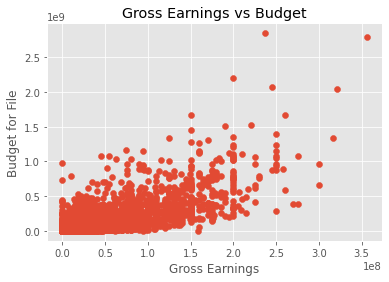

In [15]:
# The scatter plot with gross vs budget

plt.scatter(x=df_sort_gross['budget'], y=df_sort_gross['gross'])
plt.title('Gross Earnings vs Budget')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for File')
plt.show()

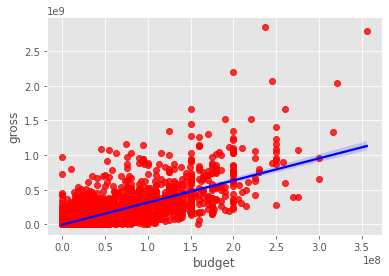

In [16]:
# create the correlation plot, Gross vs budget

sns.regplot(x='budget', y='gross', data=df_sort_gross, 
            scatter_kws={'color':'red'}, line_kws={'color':'blue'})

=> It looks like Gross and Budget have positive correlation, but we don't know how that much is

### Looking at the correlation

In [18]:
# correlation

# pearson correlation
df.corr(method = 'pearson')

# other type of correlation:
# pearson, kendall, spearman

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


=> The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables.


=> For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.

=> One of the hypothesis right, there is High correlation between budget and gross, 0.750157	

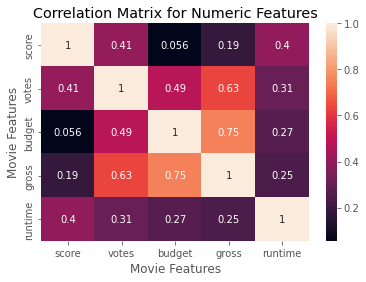

In [21]:
# create correlation graph / visualization
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

## Look at the non numeric column

In [22]:
# look at the data
df.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_correct
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1980


In [47]:
# cconvert string column to category

df_numerized = df.copy()

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.sample(5)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_correct
6321,523,6,4,1139,7.2,87000.0,1449,4324,1840,55,25000000,74188937,2207,121.0,2014-01-10,2014
4836,1892,6,4,207,6.6,14000.0,234,643,1790,35,1000000,2708087,509,94.0,2005-04-29,2005
6250,1922,5,0,2393,7.0,377000.0,1549,706,2721,55,160000000,788680968,2281,130.0,2013-05-24,2013
5853,6084,6,3,2629,8.5,785000.0,2083,3218,842,14,0,426588510,1913,112.0,2011-11-02,2011
3461,3426,6,6,1354,8.0,295000.0,2152,3328,2635,55,37000000,48451803,1158,188.0,2000-01-07,2000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           7668 non-null   object        
 1   rating         7591 non-null   object        
 2   genre          7668 non-null   object        
 3   released       7666 non-null   object        
 4   score          7665 non-null   float64       
 5   votes          7665 non-null   float64       
 6   director       7668 non-null   object        
 7   writer         7665 non-null   object        
 8   star           7667 non-null   object        
 9   country        7665 non-null   object        
 10  budget         7668 non-null   int64         
 11  gross          7668 non-null   int64         
 12  company        7651 non-null   object        
 13  runtime        7664 non-null   float64       
 14  released_date  7666 non-null   datetime64[ns]
 15  year_correct   7668 n

<Figure size 864x576 with 0 Axes>

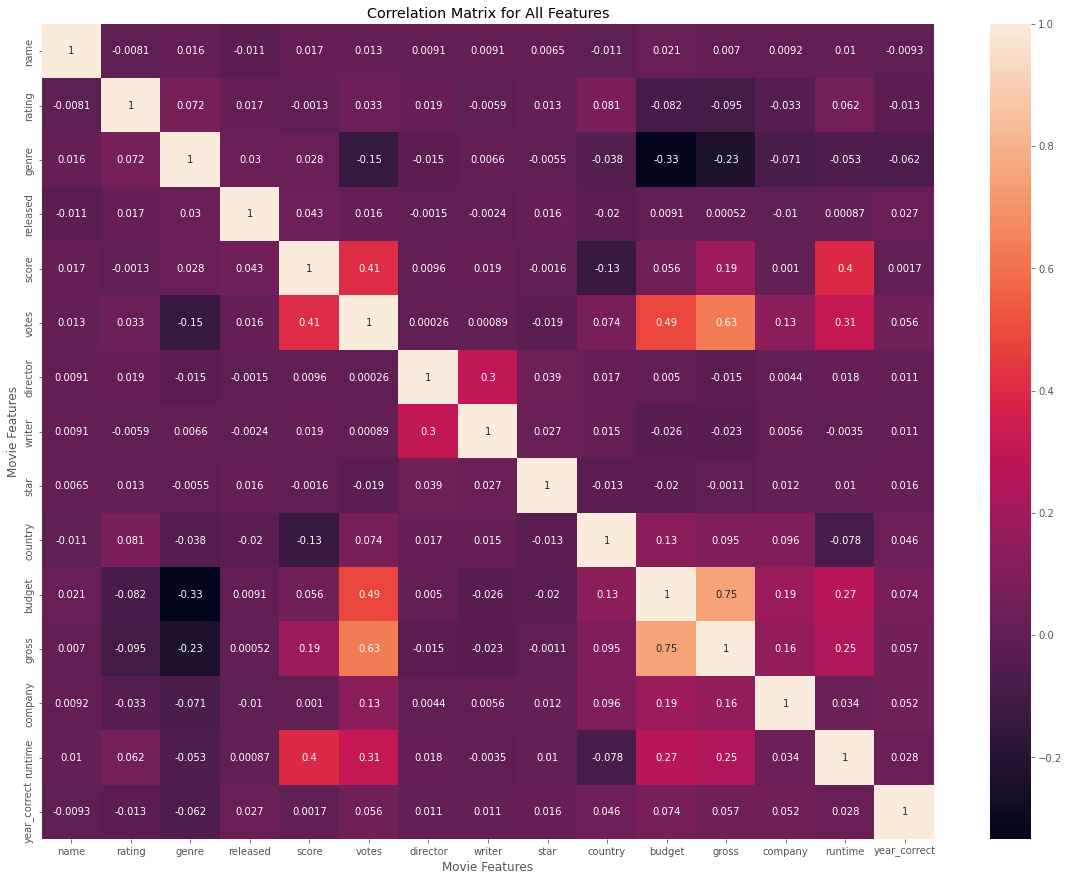

In [55]:
# create correlation graph / visualization
plt.clf()
plt.subplots(figsize=(20,15))

correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [57]:
# look at the correlation in table
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.009264
rating,-0.008069,1.000000,0.072423,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,-0.013129
genre,0.016355,0.072423,1.000000,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.061689
released,-0.011311,0.016613,0.029822,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.026875
score,0.017097,-0.001314,0.027965,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.001653
votes,0.013088,0.033225,-0.145307,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.056070
director,0.009079,0.019483,-0.015258,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,0.010682
writer,0.009081,-0.005921,0.006567,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,0.011463
star,0.006472,0.013405,-0.005477,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.016025
country,-0.010737,0.081244,-0.037615,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.078412,0.045654


In [66]:
# Look at the correlation more spesific

pd.set_option('display.max_rows', None)

corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      released   -0.011311
      score       0.017097
dtype: float64

In [65]:
# sorted it
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
              gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145307
votes         genre          -0.145307
country       score          -0.133348
score         country        -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
rating        budget         -0.081939
budget        rating         -0.081939
country       runtime        -0.078412
runtime       country        -0.078412
genre         company        -0.071067
company       genre          -0.071067
year_correct  genre          -0.061689
genre         year_correct   -0.061689
runtime       genre          -0.052711
genre         runtime        -0.052711
country       genre          -0.037615
genre         country        -0.037615
company       rating         -0.032943
rating        company        -0.032943
writer        budget         -0.025911
budget        writer     

In [63]:
# Only colum that have high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.632834
votes         gross           0.632834
gross         budget          0.750157
budget        gross           0.750157
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

=> So, our hypothesis, budget and company have  high correlation toward gross has the right and wrong

=> Turns out the high correlation also happen between votes and gross

=> But the company and gross has lower correlation

In [ ]:
# display(df.head(2))

# print(df[['budget', 'gross']].info())